Análisis de Factores --- 4:28
===

* Ultima modificación: 2023-02-27 | [YouTube](https://www.youtube.com/watch?v=UrAVlLl6e8I&list=PLEFpZ3YehTnChLjKfJ4_J7ZqNueH8JU3g&index=4)

* Esta es una técnica usada para describir la variabilidad de características correlacionadas en términos de un número bajo de variables no observadas o factores. 

* En términos estadísticos, las variables observadas son obtenidas como la combinación lineal de los factores no observados más un término de error. 

* Matemáticamente, la columna $x_i$ del dataset es computada como:
$$
x_i = Wh_i + \mu + \epsilon
$$
donde:

    * $h_i$ es la variable latente.

    * $\epsilon$ sigue una distribución normal multivariada con media cero y varianza finita $\epsilon ~ N(0, \Psi)$.

    * $\mu$ es un vector arbitrario.

* El modelo es llamado generativo, ya que indica como obtener las variables $x_i$ a partir de $h_i$.

* En consecuencia de lo anterior, el dataset puede ser representado por:

$$
\mathbf{X} = W \mathbf{H} + \mathbf{M} + \mathbf{E}
$$

* El modelo anterior puede ser interpretado de forma probabilistica como:

$$
p(x_i|h_i) = N(Wh_i + \mu, \Psi) 
$$

* Usualmente se supone que $h ~ N(0, \mathbf{I})$, tal que:

$$
p(x) = N (\mu, WW^T+\Psi)
$$

* Diferentes metodologías se obtienen al hacer supuestos sobre la estructtura de la matriz $\Psi$:

    *  Si $\Psi=\sigma^2 \mathbf{I}$, se obtiene el método de análisis de componentes principales.


    * Si $\Psi=\text{diag}(\psi_1,...,\psi_n)$ se obtiene el modelo de análisis factorial. 

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()

#
# StandardScaler: resta la media y luego divide
# por la desviaación estándar
#
X = StandardScaler().fit_transform(iris.data)
feature_names = iris.feature_names

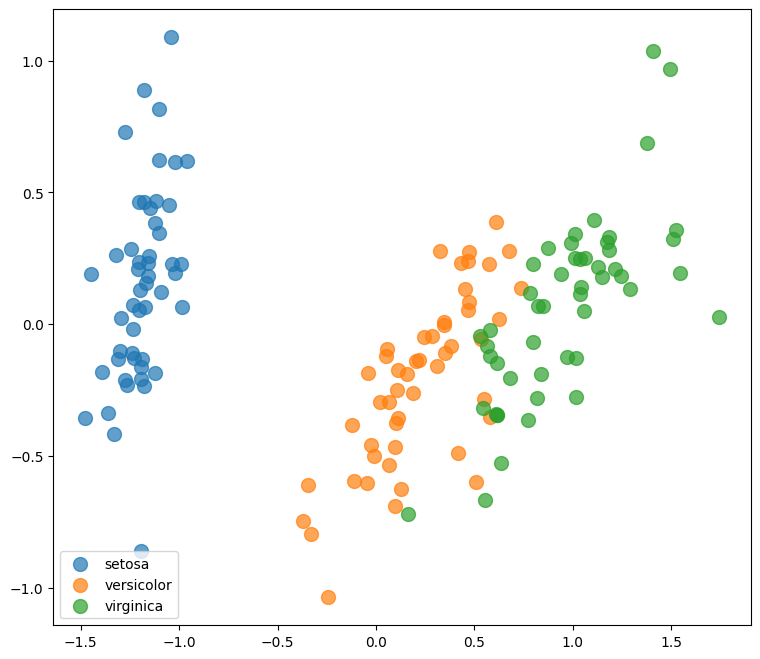

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

factorAnalysis = FactorAnalysis(
    # -----------------------------------------------------
    # Dimensionality of latent space
    n_components=None,
    # -----------------------------------------------------
    # Maximum number of iterations.
    max_iter=100,
    # -----------------------------------------------------
    # Which SVD method to use. 'lapack', 'randomized', None
    svd_method="randomized",
    # -----------------------------------------------------
    # Only used when svd_method equals 'randomized'.
    random_state=0,
)
X_factor = factorAnalysis.fit_transform(X)

colors = ["tab:blue", "tab:orange", "tab:green"]

plt.figure(figsize=(9, 8))
for i_species in range(3):

    plt.scatter(
        x=X_factor[iris.target == i_species, 0],
        y=X_factor[iris.target == i_species, 1],
        c=colors[i_species],
        s=100,
        marker="o",
        alpha=0.7,
        label=iris.target_names[i_species],
    )


plt.legend()
plt.show()